# COMP4318/5318 Assignment 2: Image Classification

### Group number: 42  , SID1: 520330054 , SID2: ..., SID3: ... 

This template notebook includes code to load the  dataset and a skeleton for the main sections that should be included in the notebook. Please stick to this struture for your submitted notebook.

Please focus on making your code clear, with appropriate variable names and whitespace. Include comments and markdown text to aid the readability of your code where relevant. See the specification and marking criteria in the associated specification to guide you when completing your implementation.

## Setup and dependencies
Please use this section to list and set up all your required libraries/dependencies and your plotting environment. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, top_k_accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

## 1. Data loading, exploration, and preprocessing


Code to load the dataset is provided in the following cell. Please proceed with your data exploration and preprocessing in the remainder of this section.

In [2]:
# Load the dataset training and test sets as numpy arrays
# assuming Assignment2Data folder is present in the same directory 
# as the notebook
X_train: np.ndarray = np.load('Assignment2Data/X_train.npy')
y_train: np.ndarray = np.load('Assignment2Data/y_train.npy')
X_test: np.ndarray = np.load('Assignment2Data/X_test.npy')
y_test: np.ndarray = np.load('Assignment2Data/y_test.npy')

In [3]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# Flatten for SVM
X_train_flat = X_train.reshape(len(X_train), -1).astype(np.float32)
X_test_flat  = X_test.reshape(len(X_test), -1).astype(np.float32)

### Examples of preprocessed data
Please print/display some examples of your preprocessed data here.

In [5]:
cifar10_label_to_text = {
    0: "airplane",
    1: "automobile",
    2: "bird", 
    3: "cat",
    4: "deer", 
    5: "dog",
    6: "frog", 
    7: "horse", 
    8: "ship", 
    9: "truck",
}

In [6]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape} type: {type(y_train[0])}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape} type: {type(y_test[0])}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000,) type: <class 'numpy.int64'>
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000,) type: <class 'numpy.int64'>


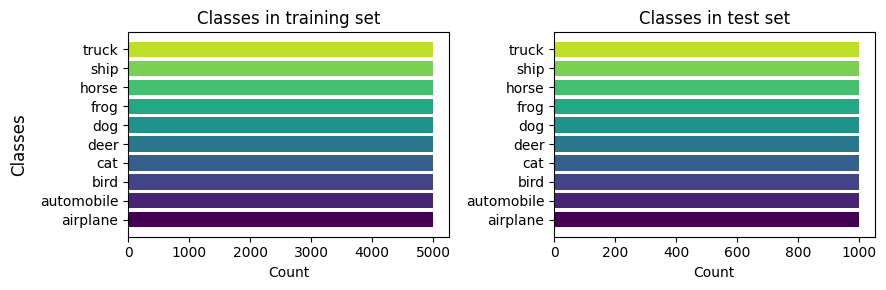

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

for i, (dataset, title) in enumerate([(y_train, 'training'), (y_test, 'test')]):
    labels, counts = np.unique(dataset, return_counts=True)
    cmap = plt.get_cmap('viridis')
    colors = [cmap(i / len(labels)) for i in range(len(labels))]
    labels_text = [cifar10_label_to_text[label] for label in labels]

    axs[i].barh(labels_text, counts, color=colors)
    axs[i].set_title(f'Classes in {title} set')
    axs[i].set_xlabel('Count')

fig.supylabel('Classes')
plt.tight_layout()

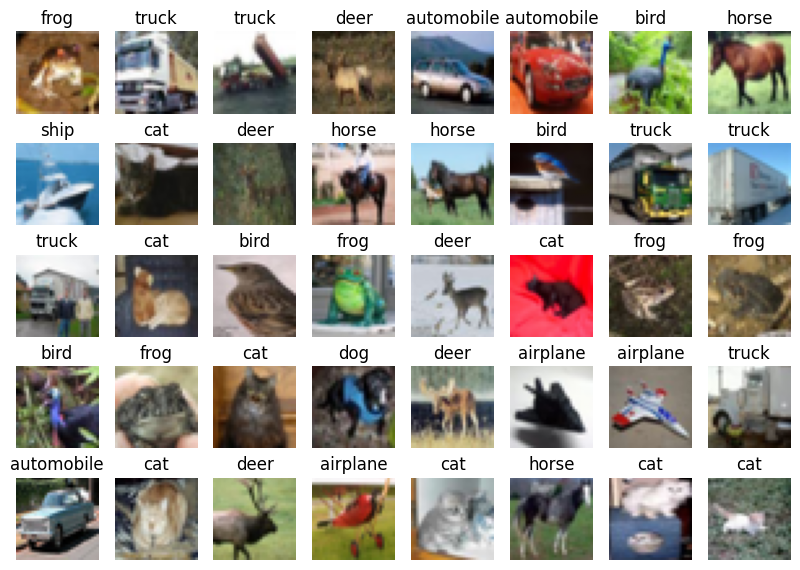

In [8]:
N_ROWS = 5; N_COLS = 8
fig, axs = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=(10, 7))

for i in range(N_ROWS):
    for j in range(N_COLS):
        axs[i][j].imshow(X_train[i*N_COLS+j])
        axs[i][j].axis('off')
        axs[i][j].set_title(cifar10_label_to_text[y_train[i*N_COLS+j]])

plt.show()

## 2. Algorithm design and setup

### Algorithm of choice from first six weeks of course

In [9]:
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.8)),
    ("svc", SVC(kernel="rbf")),
])

svm_pipe.fit(X_train_flat, y_train)
y_pred = svm_pipe.predict(X_test_flat)

In [ ]:
print(classification_report(y_test,y_pred))
print(f"Top-5 accuracy results: {top_k_accuracy_score(y_test,y_pred,k=5)}")

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      1000
           1       0.61      0.62      0.62      1000
           2       0.40      0.37      0.39      1000
           3       0.36      0.34      0.35      1000
           4       0.43      0.41      0.42      1000
           5       0.49      0.42      0.45      1000
           6       0.49      0.62      0.55      1000
           7       0.61      0.54      0.57      1000
           8       0.61      0.67      0.64      1000
           9       0.57      0.59      0.58      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.51     10000
weighted avg       0.52      0.52      0.51     10000



### Fully connected neural network

### Convolutional neural network

## 3. Hyperparameter tuning

### Algorithm of choice from first six weeks of course

In [ ]:
param_grid = {
    "pca__n_components": [0.4, 0.8],
    "svc__C": [0.1, 1, 10],
    "svc__gamma": ["scale", 1e-3, 1e-2],
}
clf = GridSearchCV(
    svm_pipe, param_grid=param_grid, cv=StratifiedKFold(shuffle=True), return_train_score=True, verbose=3
)
clf.fit(X_train_flat, y_train)
y_predicted = clf.predict(X_test_flat)

In [ ]:
print(f"Best params: {clf.best_params_}")
print(f"Best cross-validation score: {clf.best_score_}")
print(classification_report(y_test, y_predicted))

### Fully connected neural network

### Convolutional neural network

## 4. Final models
In this section, please ensure to include cells to train each model with its best hyperparmater combination independently of the hyperparameter tuning cells, i.e. don't rely on the hyperparameter tuning cells having been run.

### Algorithm of choice from first six weeks of course

In [ ]:
final_svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.8)),
    ("svc", SVC(kernel="rbf")),
])
final_svm_pipe.fit(X_train_flat, y_train)


### Fully connected neural network

### Convolutional neural network